# 1. Random Variable and Probability

In [62]:
from scipy import stats

In [11]:
stats.norm.cdf(x = 680, loc = 711, scale = 29) # 14 % of students scored less than 680.

0.14254260383881612

In [12]:
stats.norm.cdf(x = 740 , loc = 711, scale = 29) - stats.norm.cdf(x = 697, loc = 711, scale = 29) 
#53 % of the students scored between 697 and 740.

0.5267111786415019

# 2. Normal Distribution

In [1]:
import pandas as pd

In [2]:
glaxo_data = pd.read_csv('GLAXO.csv')
beml_data = pd.read_csv('BEML.csv')

In [3]:
glaxo_data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [4]:
beml_data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [5]:
glaxo_data.shape

(1739, 8)

In [6]:
beml_data.shape

(1739, 8)

In [7]:
beml_data_daily_trade  = beml_data[['Date','Close']]
glaxo_data_daily_trade = glaxo_data[['Date','Close']] 

In [8]:
beml_data_daily_trade.head(10)

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
5,2010-01-11,1137.00
6,2010-01-12,1143.65
7,2010-01-13,1142.25
8,2010-01-14,1148.20
9,2010-01-15,1207.05


In [9]:
glaxo_data_daily_trade.head(10)

,Date,Close
0,2010-01-04,1625.65
1,2010-01-05,1616.80
2,2010-01-06,1638.50
3,2010-01-07,1648.70
4,2010-01-08,1639.80
5,2010-01-11,1629.45
6,2010-01-12,1583.85
7,2010-01-13,1571.30
8,2010-01-14,1573.55
9,2010-01-15,1570.40


In [10]:
glaxo_data_daily_trade.dtypes

Date      object
Close    float64
dtype: object

In [11]:
beml_data_daily_trade.dtypes

Date      object
Close    float64
dtype: object

In [17]:
glaxo_data_daily_trade.Date = pd.to_datetime(glaxo_data_daily_trade.Date)
beml_data_daily_trade.Date  = pd.to_datetime(beml_data_daily_trade.Date)

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
glaxo_data_daily_trade.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [20]:
beml_data_daily_trade.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

## Data Vizulaiztion for analysis

Text(0, 0.5, 'Close Price')

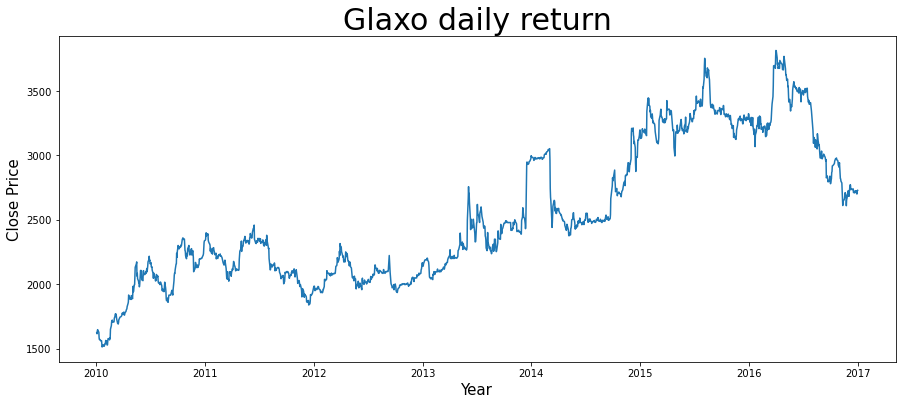

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,6))
plt.plot(glaxo_data_daily_trade.Date, glaxo_data_daily_trade.Close)
plt.title('Glaxo daily return',size = 30)
plt.xlabel('Year',size = 15)
plt.ylabel('Close Price',size =15)

Text(0, 0.5, 'Close Price')

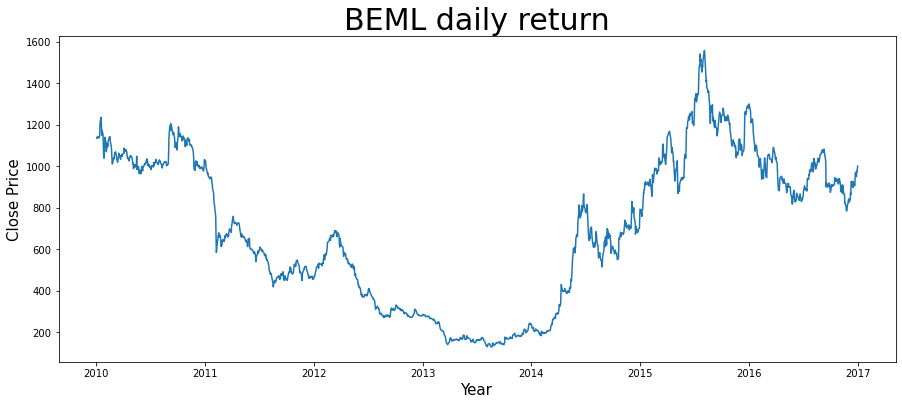

In [31]:
plt.figure(figsize = (15,6))
plt.plot(beml_data_daily_trade.Date, beml_data_daily_trade.Close)
plt.title('BEML daily return',size = 30)
plt.xlabel('Year',size = 15)
plt.ylabel('Close Price',size =15)

## Understanding Gain

In [32]:
beml_data_daily_trade['Gain'] = beml_data_daily_trade.Close.pct_change(periods=1)
glaxo_data_daily_trade['Gain'] = glaxo_data_daily_trade.Close.pct_change(periods=1)

In [33]:
beml_data_daily_trade.head(10)

,Date,Close,Gain
0,2010-01-04,1135.60,NaN
1,2010-01-05,1134.60,-0.000881
2,2010-01-06,1139.60,0.004407
3,2010-01-07,1144.15,0.003993
4,2010-01-08,1144.05,-0.000087
5,2010-01-11,1137.00,-0.006162
6,2010-01-12,1143.65,0.005849
7,2010-01-13,1142.25,-0.001224
8,2010-01-14,1148.20,0.005209
9,2010-01-15,1207.05,0.051254


In [34]:
glaxo_data_daily_trade.head(10)

,Date,Close,Gain
0,2010-01-04,1625.65,NaN
1,2010-01-05,1616.80,-0.005444
2,2010-01-06,1638.50,0.013422
3,2010-01-07,1648.70,0.006225
4,2010-01-08,1639.80,-0.005398
5,2010-01-11,1629.45,-0.006312
6,2010-01-12,1583.85,-0.027985
7,2010-01-13,1571.30,-0.007924
8,2010-01-14,1573.55,0.001432
9,2010-01-15,1570.40,-0.002002


In [35]:
glaxo_data_daily_trade.dtypes

Date     datetime64[ns]
Close           float64
Gain            float64
dtype: object

## Data Cleaning

In [45]:
glaxo_data_daily_trade.dropna(inplace=True)
beml_data_daily_trade.dropna(inplace = True)

In [46]:
glaxo_data_daily_trade.head()

,Date,Close,Gain
1,2010-01-05,1616.80,-0.005444
2,2010-01-06,1638.50,0.013422
3,2010-01-07,1648.70,0.006225
4,2010-01-08,1639.80,-0.005398
5,2010-01-11,1629.45,-0.006312


In [47]:
beml_data_daily_trade.head()

,Date,Close,Gain
1,2010-01-05,1134.60,-0.000881
2,2010-01-06,1139.60,0.004407
3,2010-01-07,1144.15,0.003993
4,2010-01-08,1144.05,-0.000087
5,2010-01-11,1137.00,-0.006162


## Understanding Gain Vs Time

Text(0, 0.5, 'Gain')

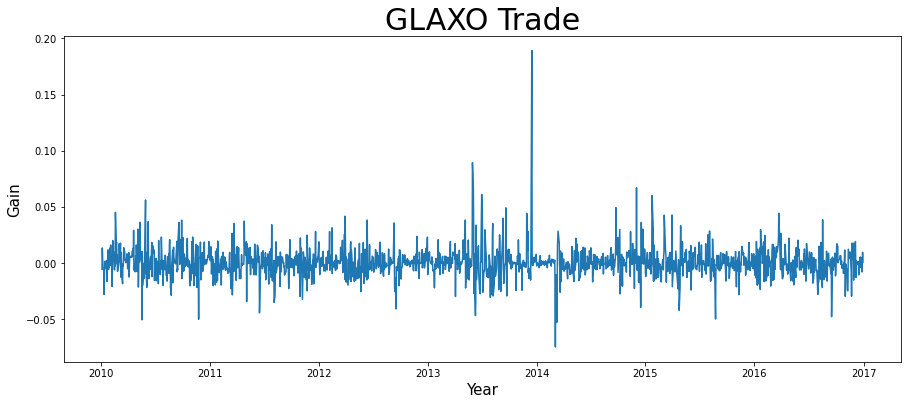

In [48]:
plt.figure(figsize=(15,6))
plt.title('GLAXO Trade', size=30)
plt.plot(glaxo_data_daily_trade.Date,glaxo_data_daily_trade.Gain)
plt.xlabel('Year',size=15)
plt.ylabel('Gain',size=15)

Text(0, 0.5, 'Gain')

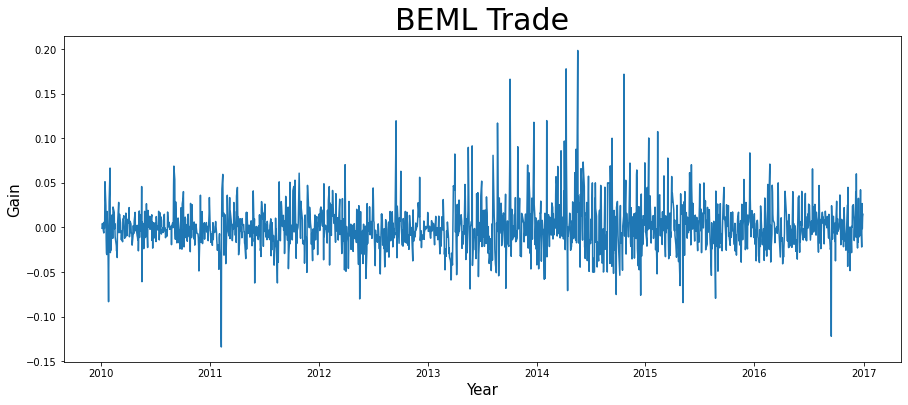

In [50]:
plt.figure(figsize=(15,6))
plt.title('BEML Trade', size=30)
plt.plot(beml_data_daily_trade.Date,beml_data_daily_trade.Gain)
plt.xlabel('Year',size=15)
plt.ylabel('Gain',size=15)

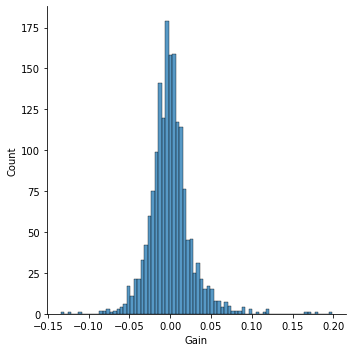

In [53]:
import seaborn as sns
sns.displot(data = beml_data_daily_trade,x='Gain')

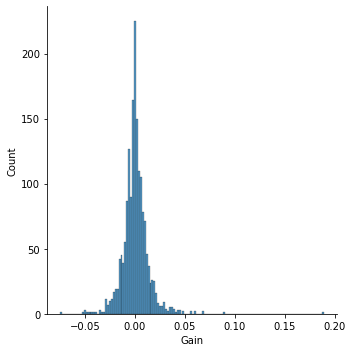

In [54]:
sns.displot(data = glaxo_data_daily_trade,x='Gain')

## Finding out mean and std of BEML and GLAXO stocks for later analysis

In [60]:
print("Mean of Glaxo: ",round(glaxo_data_daily_trade.Gain.mean(),4))
print("STD of Glaxo: ",round(glaxo_data_daily_trade.Gain.std(),4))

Mean of Glaxo:  0.0004
STD of Glaxo:  0.0134


In [61]:
print("Mean of BEML: ",round(beml_data_daily_trade.Gain.mean(),4))
print("STD of BEML: ",round(beml_data_daily_trade.Gain.std(),4))

Mean of BEML:  0.0003
STD of BEML:  0.0264


## Question to Raise before investing money on any stocks - GO PROACTIVE!!

In [65]:
#Probability of making  2% loss or higher in Glaxo:
stats.norm.cdf(x = -0.02, loc = 0.0004, scale = 0.0134)
#There will 6% chance that you will loose 2% of your money.

0.06395593743937553

In [66]:
#Probability of making 2% loss or higher in BEML: 
stats.norm.cdf(x=-0.02,loc = 0.0003,scale=0.0264)
#There will 22% chance that you will loose 2% of your money.

0.22096464496279805

In [69]:
#Probability of making 2% gain or higher in Glaxo:
1 - stats.norm.cdf(x = 0.02, loc = 0.0004, scale = 0.0134)
#There will 7% chance that you will gain 2% of your money.

0.07177658173190637

In [71]:
#Probability of making 2% gain or higher in BEML:
1 - stats.norm.cdf(x = 0.02, loc = 0.0003, scale = 0.0264)
#There will 23% chance that you will gain 2% of your money.

0.2277696435431158

# THE END !!!!!